# 1 - Quantidade de bolsas de iniciação científica por discente nas unidades da UFRN desde 2009

In [0]:
# Leitura dos dados
import pandas as pd

dados = []
for ii in range(2009,2020):
  csv = 'discentes-' + str(ii) + '.csv'
  
  dado = pd.read_csv(csv, sep=';')
  dados.append(dado)
  
discentes = pd.concat(dados, ignore_index=True)

In [0]:
#Selecionando apenas os discentes de graduação
discentes_graduacao = discentes.loc[discentes['nivel_ensino'] == 'GRADUAÇÃO', :]

In [0]:
#Colocando a soma dos valores em um dataframe para saber a quantidade de alunos por unidade
unidade_alunos = pd.DataFrame(data=discentes_graduacao['id_unidade'].value_counts())
unidade_alunos.reset_index(inplace=True)
unidade_alunos.rename(columns={'id_unidade':'num_discentes_grad', 'index':'id_unidade'}, inplace=True)

In [0]:
#Lendo os dados de bolsa
bolsas = pd.read_csv("bolsistas-de-iniciacao-cientifica.csv", sep=";")

In [0]:
#Selecionando bolsas a partir de 2009
bolsas_ap_2009 = bolsas[bolsas['ano'] >= 2009]

In [0]:
#Colocando a soma dos valores em um dataframe para saber a quantidade de bolsas por unidade
unidade_bolsas = pd.DataFrame(data=bolsas_ap_2009['id_unidade'].value_counts())
unidade_bolsas.reset_index(inplace=True)
unidade_bolsas.rename(columns={'id_unidade':'num_bolsas_ic', 'index':'id_unidade'}, inplace=True)

In [0]:
#Unindo os dataframes gerados
info_unidades = pd.merge(left=unidade_bolsas, right=unidade_alunos, on='id_unidade')

In [0]:
#Lendo os dados das unidades
unidades = pd.read_csv('unidades.csv', sep=';')

In [0]:
#Selecionando o nome e sigla das unidades e unindo com a outra tabela
info_unidades = pd.merge(left=info_unidades, right=unidades[['id_unidade', 'nome_unidade', 'sigla']], on='id_unidade')

In [0]:
#Calculando a porcentagem 
info_unidades['bolsa_por_aluno'] = info_unidades['num_bolsas_ic'] / info_unidades['num_discentes_grad']

In [0]:
#Observando os dados
info_unidades.head()

,id_unidade,num_bolsas_ic,num_discentes_grad,nome_unidade,sigla,bolsa_por_aluno
0,351,1092,1607,ESCOLA AGRICOLA DE JUNDIAI,EAJ,0.679527
1,4885,945,12642,ESCOLA DE CIENCIAS E TECNOLOGIA,ECT,0.074751
2,4890,640,1611,FACULDADE DE CIENCIAS DA SAUDE DO TRAIRI - FACISA,FACISA,0.397269
3,205,252,772,ESCOLA DE SAUDE,ES/UFRN,0.326425
4,284,149,783,ESCOLA DE MUSICA,EMUFRN,0.190294


In [0]:
#Observando os dados
info_unidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
id_unidade            15 non-null int64
num_bolsas_ic         15 non-null int64
num_discentes_grad    15 non-null int64
nome_unidade          15 non-null object
sigla                 15 non-null object
bolsa_por_aluno       15 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 840.0+ bytes


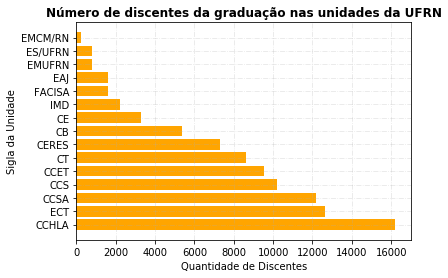

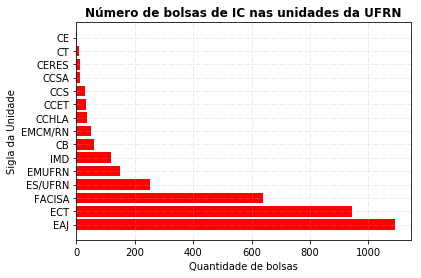

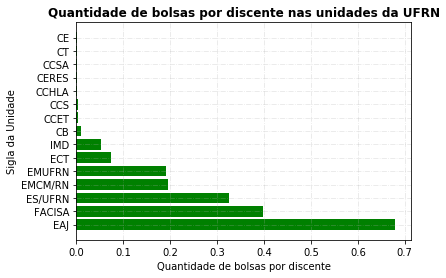

In [0]:
# Gerando os gráficos
import pandas as pd

#Numeros de discentes
ordem_alunos = info_unidades.sort_values(by=['num_discentes_grad'], ascending=False)

plt.barh(ordem_alunos['sigla'], ordem_alunos['num_discentes_grad'], color='orange')
plt.grid(b=True, linestyle='-.', alpha=0.3)
plt.title('Número de discentes da graduação nas unidades da UFRN', fontweight='bold')
plt.ylabel('Sigla da Unidade')
plt.xlabel('Quantidade de Discentes')
plt.show()

#Numero de bolsas
ordem_bolsas = info_unidades.sort_values(by=['num_bolsas_ic'], ascending=False)

plt.barh(ordem_bolsas['sigla'], ordem_bolsas['num_bolsas_ic'], color='red')
plt.grid(b=True, linestyle='-.', alpha=0.3)
plt.title('Número de bolsas de IC nas unidades da UFRN', fontweight='bold')
plt.ylabel('Sigla da Unidade')
plt.xlabel('Quantidade de bolsas')
plt.show()

#Quantidade de bolsas por aluno
ordem_bolsas_por_alunos = info_unidades.sort_values(by=['bolsa_por_aluno'], ascending=False)

plt.barh(ordem_bolsas_por_alunos['sigla'], ordem_bolsas_por_alunos['bolsa_por_aluno'], color='green')
plt.grid(b=True, linestyle='-.', alpha=0.3)
plt.title('Quantidade de bolsas por discente nas unidades da UFRN', fontweight='bold')
plt.ylabel('Sigla da Unidade')
plt.xlabel('Quantidade de bolsas por discente')
plt.show()

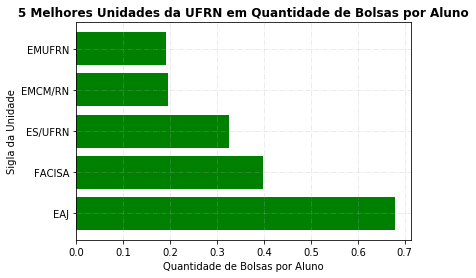

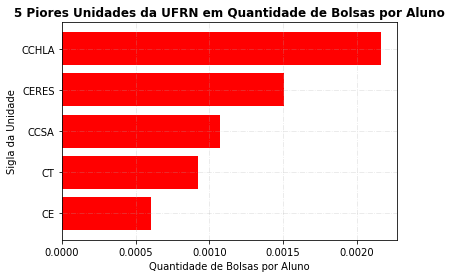

In [0]:
# Visualização das 5 maiores e 5 piores unidade em quantidade de bolsas por aluno

melhores5 = info_unidades.sort_values(by=['bolsa_por_aluno'], ascending=False).head(5)

plt.barh(melhores5['sigla'], melhores5['bolsa_por_aluno'], color='green')
plt.grid(b=True, linestyle='-.', alpha=0.3)
plt.title('5 Melhores Unidades da UFRN em Quantidade de Bolsas por Aluno', fontweight='bold')
plt.ylabel('Sigla da Unidade')
plt.xlabel('Quantidade de Bolsas por Aluno')
plt.show()

piores5 = info_unidades.sort_values(by=['bolsa_por_aluno'], ascending=True).head(5)

plt.barh(piores5['sigla'], piores5['bolsa_por_aluno'], color='red')
plt.grid(b=True, linestyle='-.', alpha=0.3)
plt.title('5 Piores Unidades da UFRN em Quantidade de Bolsas por Aluno', fontweight='bold')
plt.ylabel('Sigla da Unidade')
plt.xlabel('Quantidade de Bolsas por Aluno')
plt.show()

In [0]:
#Verificando correlação
info_unidades['num_bolsas_ic'].corr(info_unidades['num_discentes_grad'])

-0.15664488248741387

## Análise

É possível perceber com os gráficos que o número de discentes não tem correlação com o número de bolsas de iniciação científica, como podemos ver o CCHLA é a unidade com maior número de discentes porém está entre as 5 piores em quantidade de bolsas por aluno, já a EAJ tem o a maior quantidade de bolsas por aluno, chegando a quase 0.7 por aluno, mesmo sendo uma das unidades com menos alunos.

# 2 - Porcentagem de determinados ingressantes em graduação da UFRN desde 2009

In [0]:
#Lendo os dados
import pandas as pd

dados = []
for ii in range(2009,2020):
  csv = 'discentes-' + str(ii) + '.csv'
  
  dado = pd.read_csv(csv, sep=';')
  dado['ano_ingresso'] = ii
  dados.append(dado)
  
discentes = pd.concat(dados, ignore_index=True)

In [0]:
#Selecionando os discentes de graduação
discentes_graduacao = discentes.loc[discentes['nivel_ensino'] == 'GRADUAÇÃO', :]

## 2.1 - Por sexo

### 2.1.1 - Por unidade

In [0]:
#Agrupando pelo sexo, ano e unidade
discentes_sexo = discentes_graduacao.groupby(['id_unidade', 'nome_unidade', 'sexo', 'ano_ingresso'])

In [0]:
#Gerando o dataframe
info_ingressantes_sexo = pd.DataFrame(discentes_sexo.size())

In [0]:
#Gerando o dataframe
info_ingressantes_sexo.reset_index(inplace=True)
info_ingressantes_sexo.rename(columns={0:'qtd_alunos_grad'},inplace=True)

In [0]:
#Pegando apenas as unidades e anos existentes
todos_final = info_ingressantes_sexo.loc[:,['id_unidade', 'nome_unidade', 'ano_ingresso']]
todos_final.drop_duplicates(inplace=True)

In [0]:
#Verificando a quantidade de discentes por sexo
info_ingressantes_geral = info_ingressantes_sexo.groupby(['id_unidade','ano_ingresso']).sum()
info_ingressantes_geral.reset_index(inplace=True)

In [0]:
#Unindo os dados obtidos
todos_final = pd.merge(left=todos_final, right=info_ingressantes_geral, on=['id_unidade','ano_ingresso'], suffixes=('','_total'))
todos_final = pd.merge(left=todos_final, right=info_ingressantes_sexo.loc[info_ingressantes_sexo['sexo'] == 'F'].drop(columns='sexo'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_fem'))
todos_final = pd.merge(left=todos_final, right=info_ingressantes_sexo.loc[info_ingressantes_sexo['sexo'] == 'M'].drop(columns='sexo'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_masc'))

In [0]:
#Calculando a porcentagem
todos_final['fem_pct'] = round((todos_final['qtd_alunos_grad_fem'] / todos_final['qtd_alunos_grad']) * 100)
todos_final['masc_pct'] = round((todos_final['qtd_alunos_grad_masc'] / todos_final['qtd_alunos_grad']) * 100)

In [0]:
#Observando os dados
todos_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 8 columns):
id_unidade              154 non-null float64
nome_unidade            154 non-null object
ano_ingresso            154 non-null int64
qtd_alunos_grad         154 non-null int64
qtd_alunos_grad_fem     154 non-null int64
qtd_alunos_grad_masc    154 non-null int64
fem_pct                 154 non-null float64
masc_pct                154 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.8+ KB


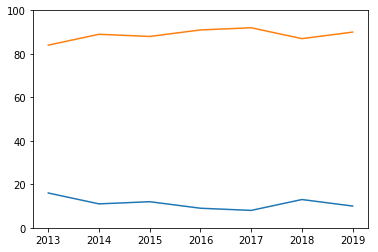

In [0]:
# Apenas para verificação dos dados gerados

import matplotlib.pyplot as plt

imd = todos_final.loc[todos_final['id_unidade'] == 6069]
plt.plot(imd['ano_ingresso'], imd['fem_pct'])
plt.plot(imd['ano_ingresso'], imd['masc_pct'])
plt.ylim(0, 100)
plt.show()

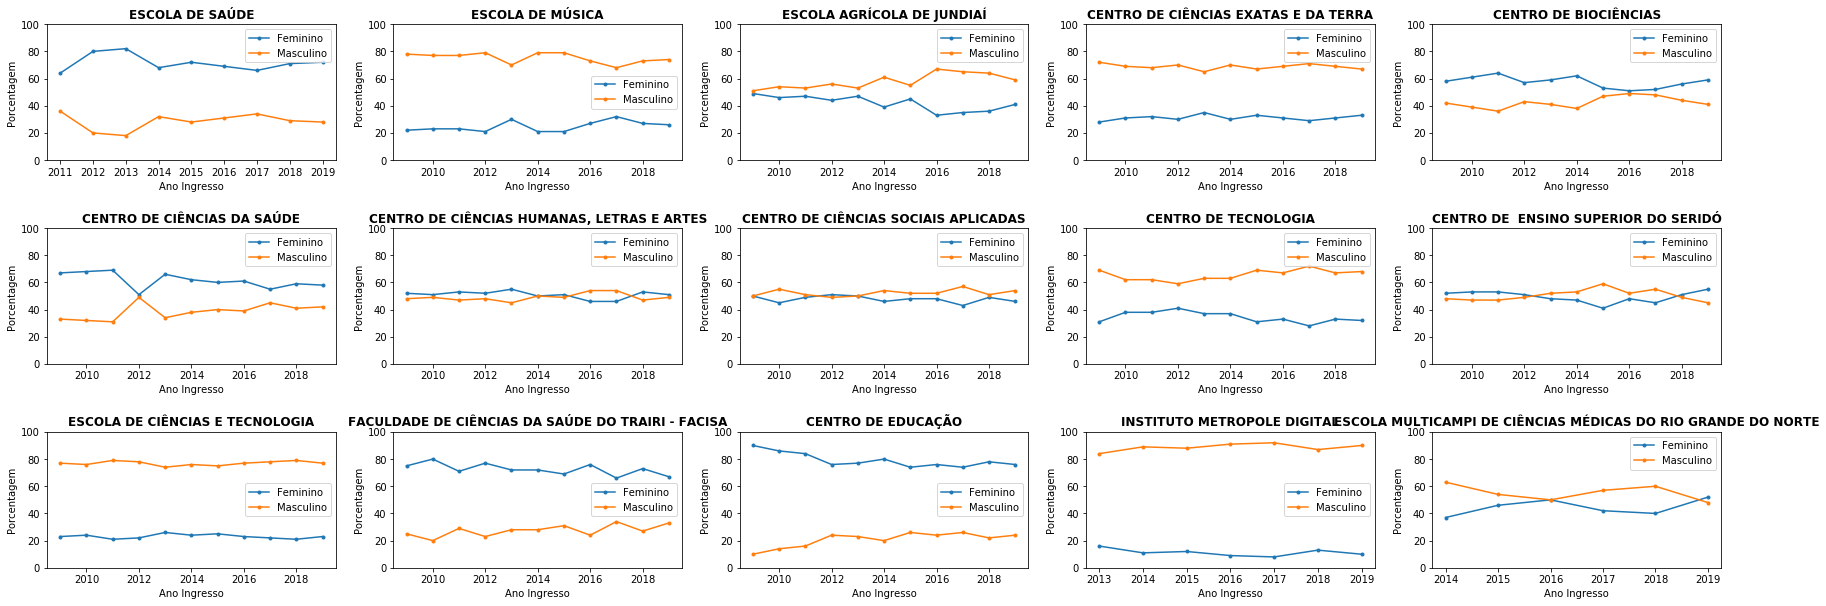

In [0]:
# Visualizaçao de todas unidades da UFRN

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for id_unidade, ii in zip(todos_final['id_unidade'].unique(), range(1, 16)):
  dado = todos_final.loc[todos_final['id_unidade'] == id_unidade]
  
  ax = fig.add_subplot(3, 5, ii)

  ax.plot(dado['ano_ingresso'], dado['fem_pct'], label='Feminino', marker='.')
  ax.plot(dado['ano_ingresso'], dado['masc_pct'], label='Masculino', marker='.')
  ax.set_xlabel('Ano Ingresso')
  ax.set_ylabel('Porcentagem')
  ax.set_title(dado.iloc[0, 1], fontweight='bold')
  ax.set_ylim(0, 100)
  ax.legend()
  
plt.show()

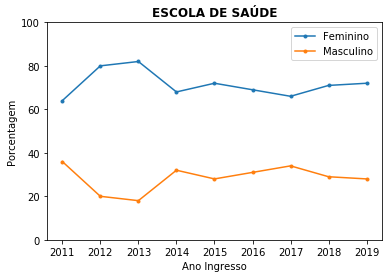

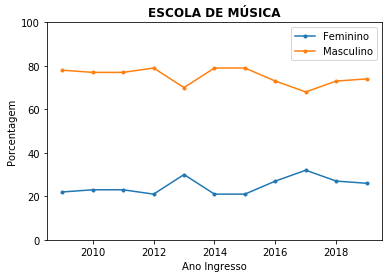

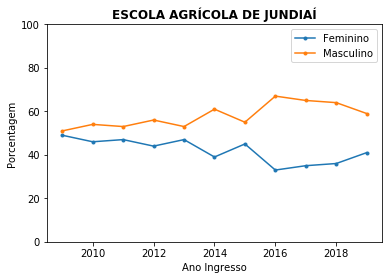

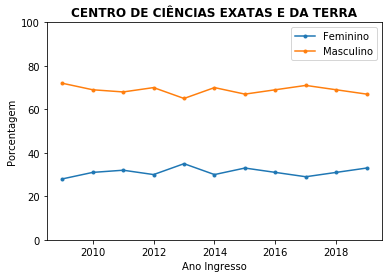

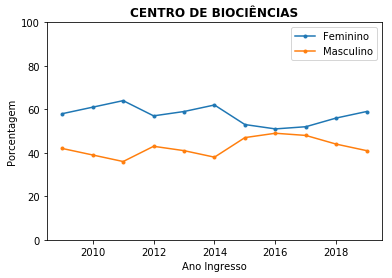

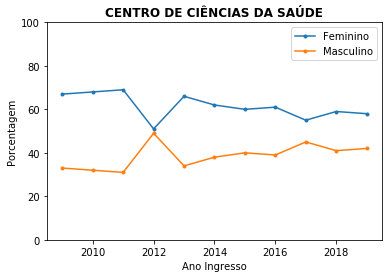

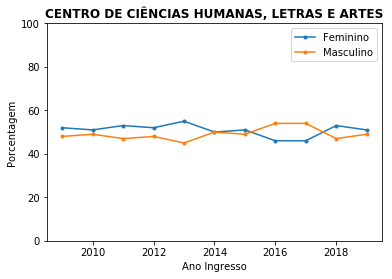

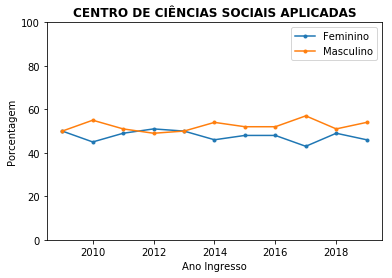

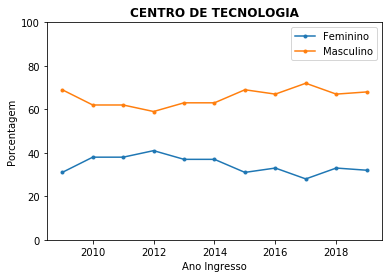

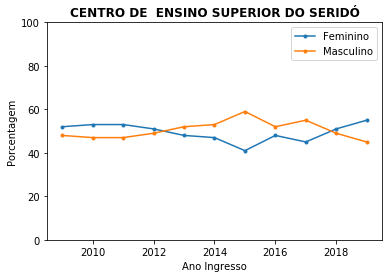

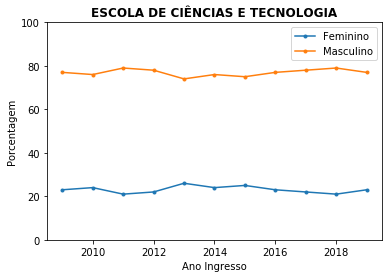

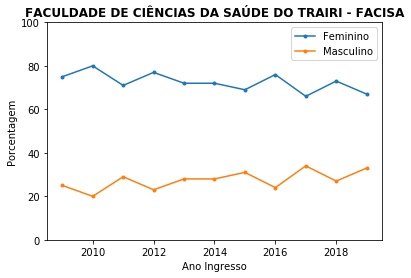

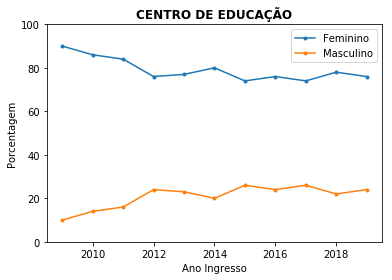

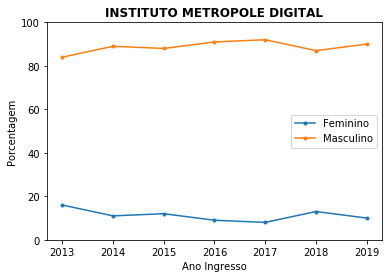

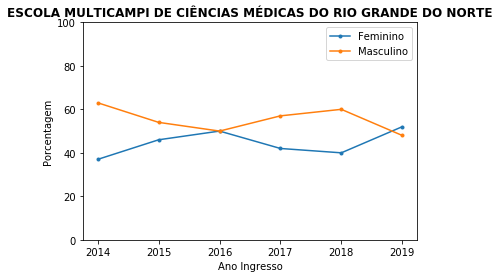

In [0]:
# Visualizaçao por unidade da UFRN

import matplotlib.pyplot as plt

for id_unidade, ii in zip(todos_final['id_unidade'].unique(), range(1, 16)):
  dado = todos_final.loc[todos_final['id_unidade'] == id_unidade]

  plt.plot(dado['ano_ingresso'], dado['fem_pct'], label='Feminino', marker='.')
  plt.plot(dado['ano_ingresso'], dado['masc_pct'], label='Masculino', marker='.')
  plt.xlabel('Ano Ingresso')
  plt.ylabel('Porcentagem')
  plt.title(dado.iloc[0, 1], fontweight='bold')
  plt.ylim(0, 100)
  plt.legend()
  plt.show()

### 2.1.2 - Toda UFRN

In [0]:
#Fazendo a contagem da quantidade da UFRN em geral e calculando a porcentagem
sexo_discentes = discentes_graduacao.sexo.value_counts()
porcentagem = lambda x : round(((x / sexo_discentes.sum()) * 100), 2)
sexo_pct = [porcentagem(i) for i in sexo_discentes]

In [0]:
#Observando os dados
discentes_graduacao.sexo.unique()

array(['M', 'F', 'N'], dtype=object)

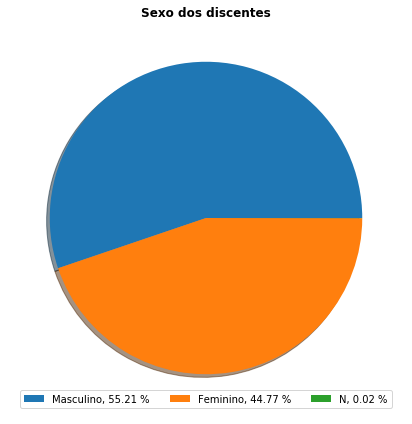

In [0]:
#Gerando gráfico com os dados
import matplotlib.pyplot as plt

plt.figure(figsize=(7,14))
plt.pie(sexo_discentes,shadow=True)
plt.legend( loc = 'lower center', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(['Masculino', 'Feminino', 'N'], sexo_pct)], ncol=3)
plt.title('Sexo dos discentes', fontweight='bold')
plt.show()

### Análise

Neste estudo, é possível analisar que a diferença entre o número de homens e mulheres na maioria das unidades é bem discrepante, e que as unidades CCHLA e CCSA contém um equilibrio. Já na UFRN em geral percebemos que mesmo com a diferença nas unidades sendo grande, no geral se mantém um equilibrio de homens e mulheres.
É possível analisar também que a aŕea de conhecimento da unidade influencia no percentual por sexo, onde área de saúde e educação tem mais pessoas do sexo feminino e nas áreas de exatas e tecnologia tem mais pessoas do sexo masculino.

## 2.2 - Por raça

### 2.2.1 - Por unidade

In [0]:
#Agrupando pelo raça, ano e unidade
discentes_raca = discentes_graduacao.groupby(['id_unidade', 'nome_unidade', 'raca', 'ano_ingresso'])

In [0]:
#Agrupando pelo raça, ano e unidade
ingressantes_raca = pd.DataFrame(discentes_raca.size())
ingressantes_raca.reset_index(inplace=True)
ingressantes_raca.rename(columns={0:'qtd_discentes'},inplace=True)

In [0]:
#Observando os dados
ingressantes_raca['raca'].unique()

array(['Amarelo (de origem oriental)', 'Branco', 'Indígeno', 'Negro',
       'Não Informado', 'Pardo', 'Remanescente de quilombo'], dtype=object)

In [0]:
#Pegando apenas as unidades e anos existentes
final_raca = ingressantes_raca.loc[:,['id_unidade', 'nome_unidade', 'ano_ingresso']]
final_raca.drop_duplicates(inplace=True)

In [0]:
#Verificando a quantidade de discentes por raça
ingressantes_total_raca = ingressantes_raca.groupby(['id_unidade','ano_ingresso']).sum()
ingressantes_total_raca.reset_index(inplace=True)

In [0]:
#Unindo os dados obtidos
final_raca = pd.merge(left=final_raca, right=ingressantes_total_raca, on=['id_unidade','ano_ingresso'], suffixes=('','_total'))
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Amarelo (de origem oriental)'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_amarelo'), how='left')
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Branco'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_branco'), how='left')
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Indígeno'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_indigena'), how='left')
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Negro'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_negro'), how='left')
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Não Informado'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_nao_informado'), how='left')
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Pardo'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_pardo'), how='left')
final_raca = pd.merge(left=final_raca, right=ingressantes_raca.loc[ingressantes_raca['raca'] == 'Remanescente de quilombo'].drop(columns='raca'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('','_quilombo'), how='left')

In [0]:
#Observando os dados
final_raca.head()

,id_unidade,nome_unidade,ano_ingresso,qtd_discentes,qtd_discentes_amarelo,qtd_discentes_branco,qtd_discentes_indigena,qtd_discentes_negro,qtd_discentes_nao_informado,qtd_discentes_pardo,qtd_discentes_quilombo
0,205.0,ESCOLA DE SAÚDE,2015,78,1.0,25,NaN,6.0,5.0,41,NaN
1,205.0,ESCOLA DE SAÚDE,2016,85,1.0,34,NaN,4.0,12.0,34,NaN
2,205.0,ESCOLA DE SAÚDE,2019,95,2.0,39,NaN,9.0,NaN,45,NaN
3,205.0,ESCOLA DE SAÚDE,2011,94,NaN,32,NaN,5.0,25.0,32,NaN
4,205.0,ESCOLA DE SAÚDE,2012,75,NaN,21,NaN,4.0,3.0,47,NaN


In [0]:
#Calculando a porcentagem
final_raca['amarelo_pct'] = round((final_raca['qtd_discentes_amarelo'] / final_raca['qtd_discentes']) * 100, 2)
final_raca['branco_pct'] = round((final_raca['qtd_discentes_branco'] / final_raca['qtd_discentes']) * 100, 2)
final_raca['indigena_pct'] = round((final_raca['qtd_discentes_indigena'] / final_raca['qtd_discentes']) * 100, 2)
final_raca['negro_pct'] = round((final_raca['qtd_discentes_negro'] / final_raca['qtd_discentes']) * 100, 2)
final_raca['nao_informado_pct'] = round((final_raca['qtd_discentes_nao_informado'] / final_raca['qtd_discentes']) * 100, 2)
final_raca['pardo_pct'] = round((final_raca['qtd_discentes_pardo'] / final_raca['qtd_discentes']) * 100, 2)
final_raca['quilombo_pct'] = round((final_raca['qtd_discentes_quilombo'] / final_raca['qtd_discentes']) * 100, 2)

In [0]:
#Ordenando pelo ano para melhor visualização dos dados
final_raca.sort_values(by=['ano_ingresso'], inplace=True)

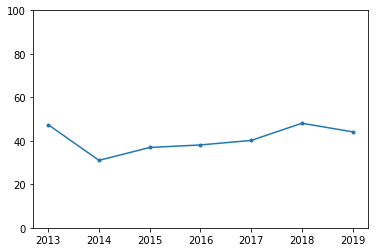

In [0]:
# Apenas para verificação dos dados gerados

import matplotlib.pyplot as plt

imd = final_raca.loc[final_raca['id_unidade'] == 6069]
imd = imd.sort_values(by=['ano_ingresso'])
plt.plot(imd['ano_ingresso'], imd['branco_pct'], marker='.')
plt.ylim(0, 100)
plt.show()

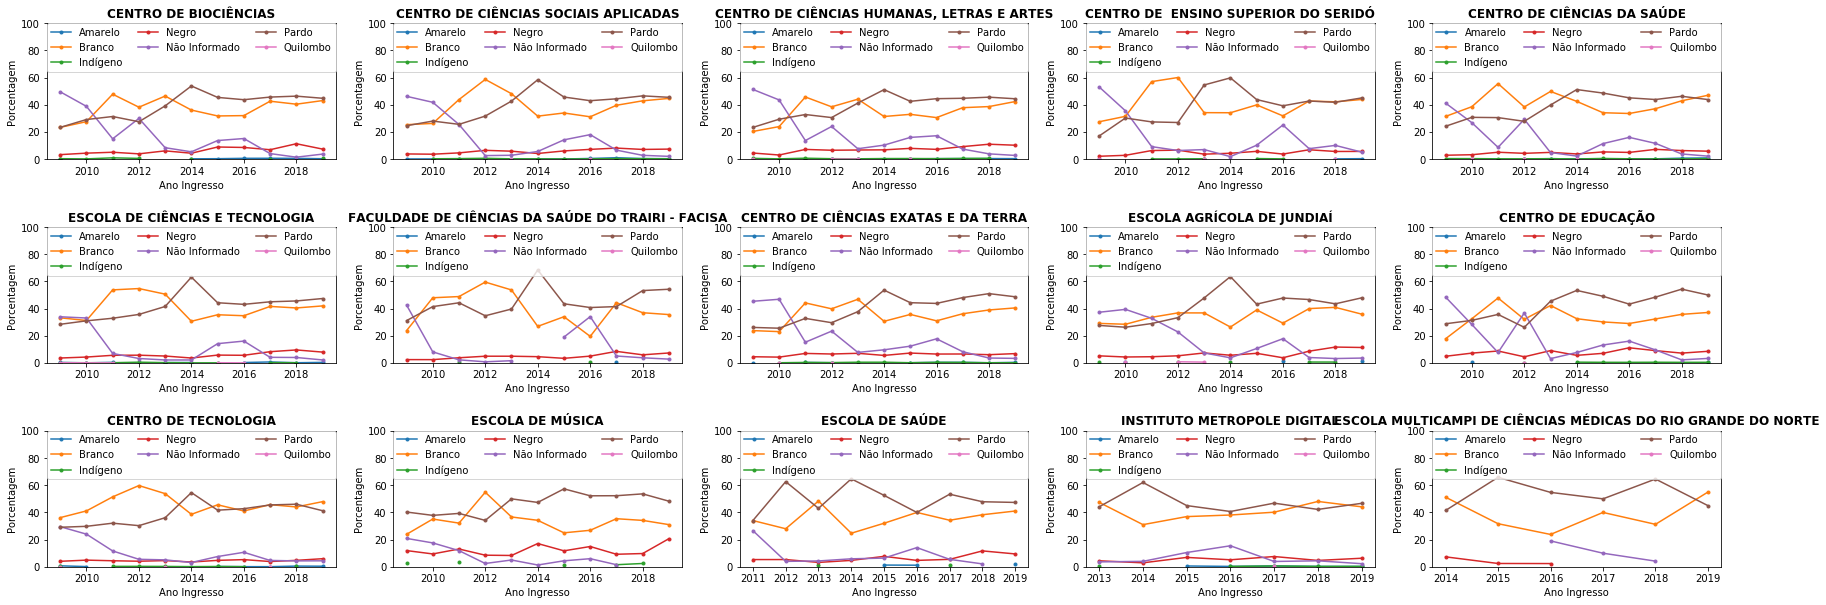

In [0]:
# Visualizaçao de todas unidades da UFRN

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for id_unidade, ii in zip(final_raca['id_unidade'].unique(), range(1, 16)):
  dado = final_raca.loc[final_raca['id_unidade'] == id_unidade]
  
  ax = fig.add_subplot(3, 5, ii)

  ax.plot(dado['ano_ingresso'], dado['amarelo_pct'], label='Amarelo', marker='.')
  ax.plot(dado['ano_ingresso'], dado['branco_pct'], label='Branco', marker='.')
  ax.plot(dado['ano_ingresso'], dado['indigena_pct'], label='Indígeno', marker='.')
  ax.plot(dado['ano_ingresso'], dado['negro_pct'], label='Negro', marker='.')
  ax.plot(dado['ano_ingresso'], dado['nao_informado_pct'], label='Não Informado', marker='.')
  ax.plot(dado['ano_ingresso'], dado['pardo_pct'], label='Pardo', marker='.')
  ax.plot(dado['ano_ingresso'], dado['quilombo_pct'], label='Quilombo', marker='.')
  ax.set_xlabel('Ano Ingresso')
  ax.set_ylabel('Porcentagem')
  ax.set_title(dado.iloc[0, 1], fontweight='bold')
  ax.set_ylim(0, 100)
  ax.legend(loc=0, ncol=3, mode="expand", borderaxespad=0.)
  
plt.show()

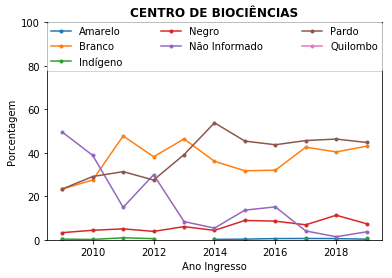

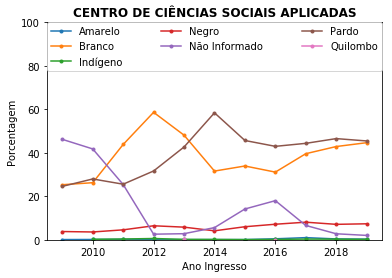

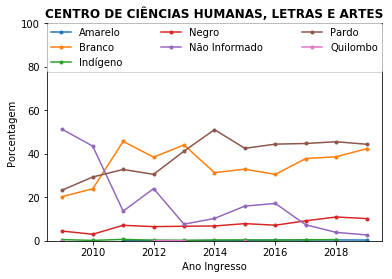

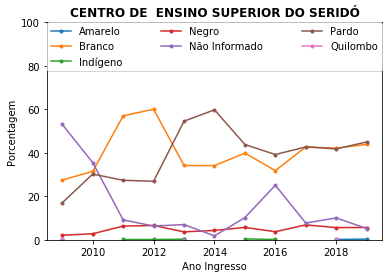

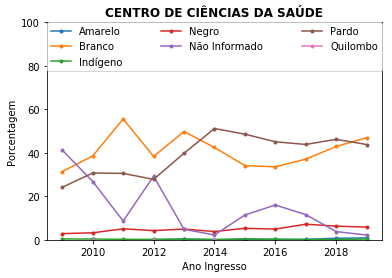

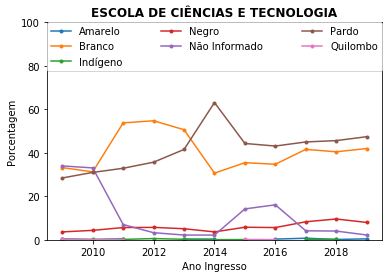

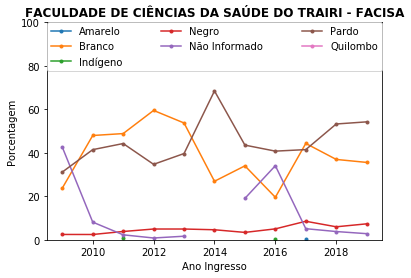

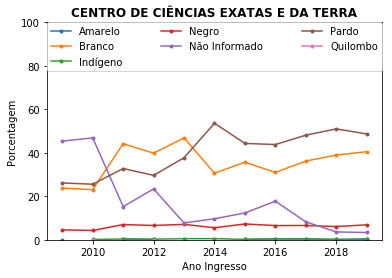

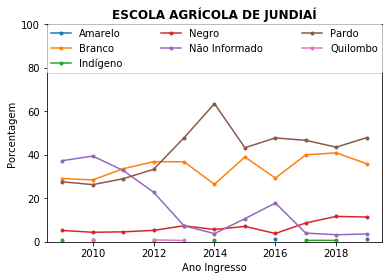

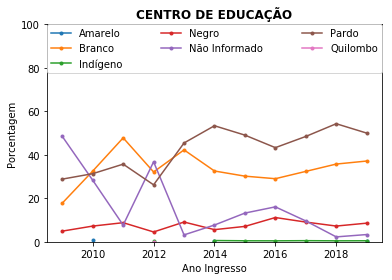

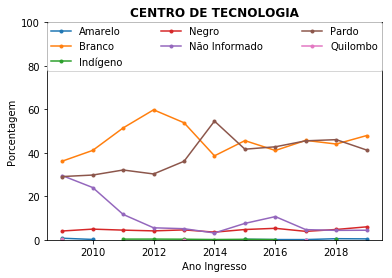

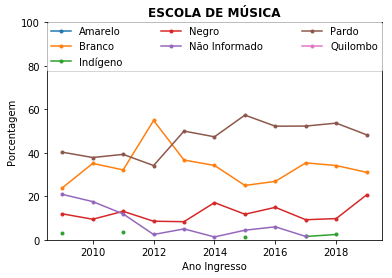

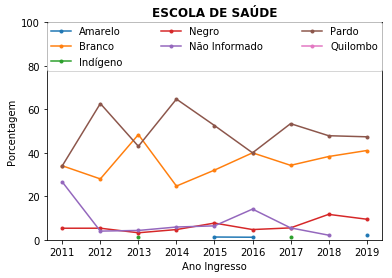

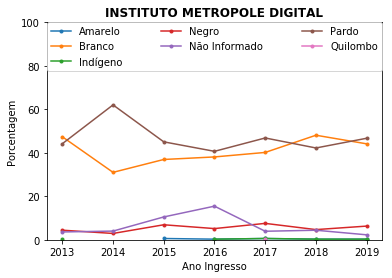

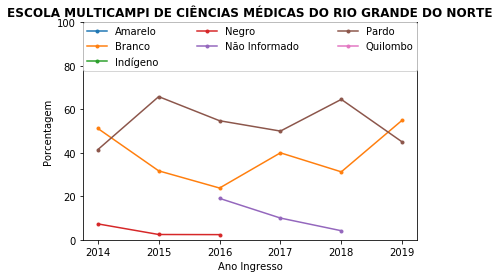

In [0]:
# Visualizaçao por unidade da UFRN

import matplotlib.pyplot as plt

for id_unidade, ii in zip(final_raca['id_unidade'].unique(), range(1, 16)):
  dado = final_raca.loc[final_raca['id_unidade'] == id_unidade]

  plt.plot(dado['ano_ingresso'], dado['amarelo_pct'], label='Amarelo', marker='.')
  plt.plot(dado['ano_ingresso'], dado['branco_pct'], label='Branco', marker='.')
  plt.plot(dado['ano_ingresso'], dado['indigena_pct'], label='Indígeno', marker='.')
  plt.plot(dado['ano_ingresso'], dado['negro_pct'], label='Negro', marker='.')
  plt.plot(dado['ano_ingresso'], dado['nao_informado_pct'], label='Não Informado', marker='.')
  plt.plot(dado['ano_ingresso'], dado['pardo_pct'], label='Pardo', marker='.')
  plt.plot(dado['ano_ingresso'], dado['quilombo_pct'], label='Quilombo', marker='.')
  plt.xlabel('Ano Ingresso')
  plt.ylabel('Porcentagem')
  plt.title(dado.iloc[0, 1], fontweight='bold')
  plt.ylim(0, 100)
  plt.legend(loc=0, ncol=3, mode="expand", borderaxespad=0.)
  plt.show()

### 2.2.2 - Toda UFRN

In [0]:
#Fazendo a contagem da quantidade da UFRN em geral e calculando a porcentagem
raca_discentes = discentes_graduacao.raca.value_counts()
porcentagem = lambda x : round(((x / raca_discentes.sum()) * 100), 2)
racas_pct = [porcentagem(i) for i in raca_discentes] 

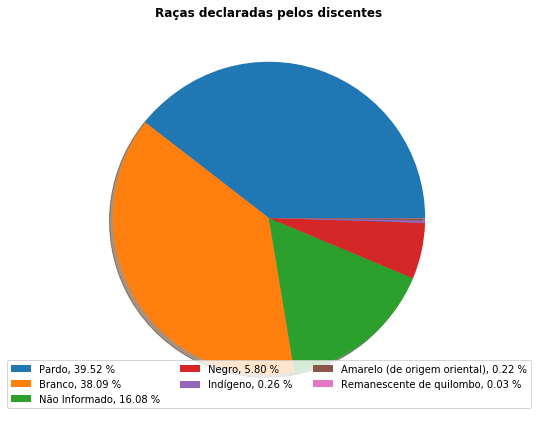

In [0]:
#Gerando gráfico com os dados
import matplotlib.pyplot as plt

plt.figure(figsize=(7,14))
plt.pie(raca_discentes,shadow=True)
plt.legend( loc = 'lower center', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(raca_discentes.index.values, racas_pct)], ncol=3)
plt.title('Raças declaradas pelos discentes', fontweight='bold')
plt.show()

### Análise

Aqui podemos analisar que a partir de 2013 o número de pardos aumentou e o número de não informados diminuiu, isso se dá muito ao fato de que a Lei de Cotas começou em agosto de 2012, o que resultou nessa mudança. No geral vimos que o número de pardos e brancos é a maior parte da UFRN, e que o negros, indigenas, quilombo e amarelos são minoria, representando aproximadamente 6% da universidade.

# 3 - Status de discentes da UFRN desde 2009

In [0]:
#Lendo os dados
import pandas as pd

dados = []
for ii in range(2009,2020):
  csv = 'discentes-' + str(ii) + '.csv'
  
  dado = pd.read_csv(csv, sep=';')
  dado['ano_ingresso'] = ii
  dados.append(dado)
  
discentes = pd.concat(dados, ignore_index=True)

In [0]:
#Selecionando os discentes de graduação
discentes_graduacao = discentes.loc[discentes['nivel_ensino'] == 'GRADUAÇÃO', :]

## 3.1 - Por unidade

In [0]:
#Observando os dados
discentes_graduacao['status'].unique()

array(['CANCELADO', 'CONCLUÍDO', 'FORMADO', 'CADASTRADO', 'ATIVO',
       'ATIVO - FORMANDO', 'TRANCADO'], dtype=object)

In [0]:
#Agrupando pelo status, ano e unidade
discentes_status = discentes_graduacao.groupby(['id_unidade', 'nome_unidade', 'status', 'ano_ingresso'])

In [0]:
#Gerando e organizando o dataframe
ingressantes_status = pd.DataFrame(discentes_status.size())
ingressantes_status.reset_index(inplace=True)
ingressantes_status.rename(columns={0:'qtd_discentes'},inplace=True)

In [0]:
#Observando os dados
ingressantes_status

,id_unidade,nome_unidade,status,ano_ingresso,qtd_discentes
0,205.0,ESCOLA DE SAÚDE,ATIVO,2014,4
1,205.0,ESCOLA DE SAÚDE,ATIVO,2015,7
2,205.0,ESCOLA DE SAÚDE,ATIVO,2016,38
3,205.0,ESCOLA DE SAÚDE,ATIVO,2017,49
4,205.0,ESCOLA DE SAÚDE,ATIVO,2018,80
5,205.0,ESCOLA DE SAÚDE,ATIVO,2019,49
6,205.0,ESCOLA DE SAÚDE,ATIVO - FORMANDO,2014,1
7,205.0,ESCOLA DE SAÚDE,ATIVO - FORMANDO,2015,3
8,205.0,ESCOLA DE SAÚDE,ATIVO - FORMANDO,2016,5
9,205.0,ESCOLA DE SAÚDE,CADASTRADO,2019,45


In [0]:
#Observando os dados
ingressantes_status['status'].unique()

array(['ATIVO', 'ATIVO - FORMANDO', 'CADASTRADO', 'CANCELADO',
       'CONCLUÍDO', 'FORMADO', 'TRANCADO'], dtype=object)

In [0]:
#Pegando apenas as unidades e anos existentes
final_status = ingressantes_status.loc[:,['id_unidade', 'nome_unidade', 'ano_ingresso']]
final_status.drop_duplicates(inplace=True)

In [0]:
#Verificando a quantidade de discentes por status
ingressantes_total_status = ingressantes_status.groupby(['id_unidade','ano_ingresso']).sum()
ingressantes_total_status.reset_index(inplace=True)

In [0]:
#Observando os dados
ingressantes_total_status.head()

,id_unidade,ano_ingresso,qtd_discentes
0,205.0,2011,94
1,205.0,2012,75
2,205.0,2013,93
3,205.0,2014,85
4,205.0,2015,78


In [0]:
#Unindo os dados obtidos
final_status = pd.merge(left=final_status, right=ingressantes_total_status, on=['id_unidade','ano_ingresso'], suffixes=('','_total'))
for status in ingressantes_status['status'].unique():
  suffixes = '_' + status.split('-')[-1].strip().lower()
  final_status = pd.merge(left=final_status, right=ingressantes_status.loc[ingressantes_status['status'] == status].drop(columns='status'), on=['id_unidade','nome_unidade','ano_ingresso'],suffixes=('',suffixes), how='left')

In [0]:
#Observando os dados
final_status

,id_unidade,nome_unidade,ano_ingresso,qtd_discentes,qtd_discentes_ativo,qtd_discentes_formando,qtd_discentes_cadastrado,qtd_discentes_cancelado,qtd_discentes_concluído,qtd_discentes_formado,qtd_discentes_trancado
0,205.0,ESCOLA DE SAÚDE,2014,85,4.0,1.0,NaN,49.0,30.0,1.0,NaN
1,205.0,ESCOLA DE SAÚDE,2015,78,7.0,3.0,NaN,32.0,34.0,1.0,1.0
2,205.0,ESCOLA DE SAÚDE,2016,85,38.0,5.0,NaN,34.0,8.0,NaN,NaN
3,205.0,ESCOLA DE SAÚDE,2017,73,49.0,NaN,NaN,20.0,2.0,NaN,2.0
4,205.0,ESCOLA DE SAÚDE,2018,94,80.0,NaN,NaN,12.0,NaN,NaN,2.0
5,205.0,ESCOLA DE SAÚDE,2019,95,49.0,NaN,45.0,1.0,NaN,NaN,NaN
6,205.0,ESCOLA DE SAÚDE,2011,94,NaN,NaN,NaN,55.0,39.0,NaN,NaN
7,205.0,ESCOLA DE SAÚDE,2012,75,NaN,NaN,NaN,28.0,47.0,NaN,NaN
8,205.0,ESCOLA DE SAÚDE,2013,93,NaN,NaN,NaN,53.0,39.0,1.0,NaN
9,284.0,ESCOLA DE MÚSICA,2012,82,2.0,NaN,NaN,29.0,51.0,NaN,NaN


In [0]:
#Calculando a porcentagem de cada status
for status in ingressantes_status['status'].unique():
  suffixes = status.split('-')[-1].strip().lower()
  final_status[suffixes + '_pct'] = round((final_status['qtd_discentes_' + suffixes] / final_status['qtd_discentes']) * 100, 2)

In [0]:
#Observando os dados
final_status.head()

,id_unidade,nome_unidade,ano_ingresso,qtd_discentes,qtd_discentes_ativo,qtd_discentes_formando,qtd_discentes_cadastrado,qtd_discentes_cancelado,qtd_discentes_concluído,qtd_discentes_formado,qtd_discentes_trancado,ativo_pct,formando_pct,cadastrado_pct,cancelado_pct,concluído_pct,formado_pct,trancado_pct
0,205.0,ESCOLA DE SAÚDE,2014,85,4.0,1.0,NaN,49.0,30.0,1.0,NaN,4.71,1.18,NaN,57.65,35.29,1.18,NaN
1,205.0,ESCOLA DE SAÚDE,2015,78,7.0,3.0,NaN,32.0,34.0,1.0,1.0,8.97,3.85,NaN,41.03,43.59,1.28,1.28
2,205.0,ESCOLA DE SAÚDE,2016,85,38.0,5.0,NaN,34.0,8.0,NaN,NaN,44.71,5.88,NaN,40.00,9.41,NaN,NaN
3,205.0,ESCOLA DE SAÚDE,2017,73,49.0,NaN,NaN,20.0,2.0,NaN,2.0,67.12,NaN,NaN,27.40,2.74,NaN,2.74
4,205.0,ESCOLA DE SAÚDE,2018,94,80.0,NaN,NaN,12.0,NaN,NaN,2.0,85.11,NaN,NaN,12.77,NaN,NaN,2.13


In [0]:
#Ordenando pelo ano para melhor visualização dos dados
final_status.sort_values(by=['ano_ingresso'], inplace=True)

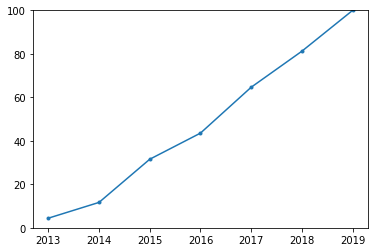

In [0]:
# Apenas para verificação dos dados gerados

import matplotlib.pyplot as plt

imd = final_status.loc[final_status['id_unidade'] == 6069]
imd = imd.sort_values(by=['ano_ingresso'])
plt.plot(imd['ano_ingresso'], imd['ativo_pct'], marker='.')
plt.ylim(0, 100)
plt.show()

In [0]:
#Observando os dados
ingressantes_status['status'].unique()

array(['ATIVO', 'ATIVO - FORMANDO', 'CADASTRADO', 'CANCELADO',
       'CONCLUÍDO', 'FORMADO', 'TRANCADO'], dtype=object)

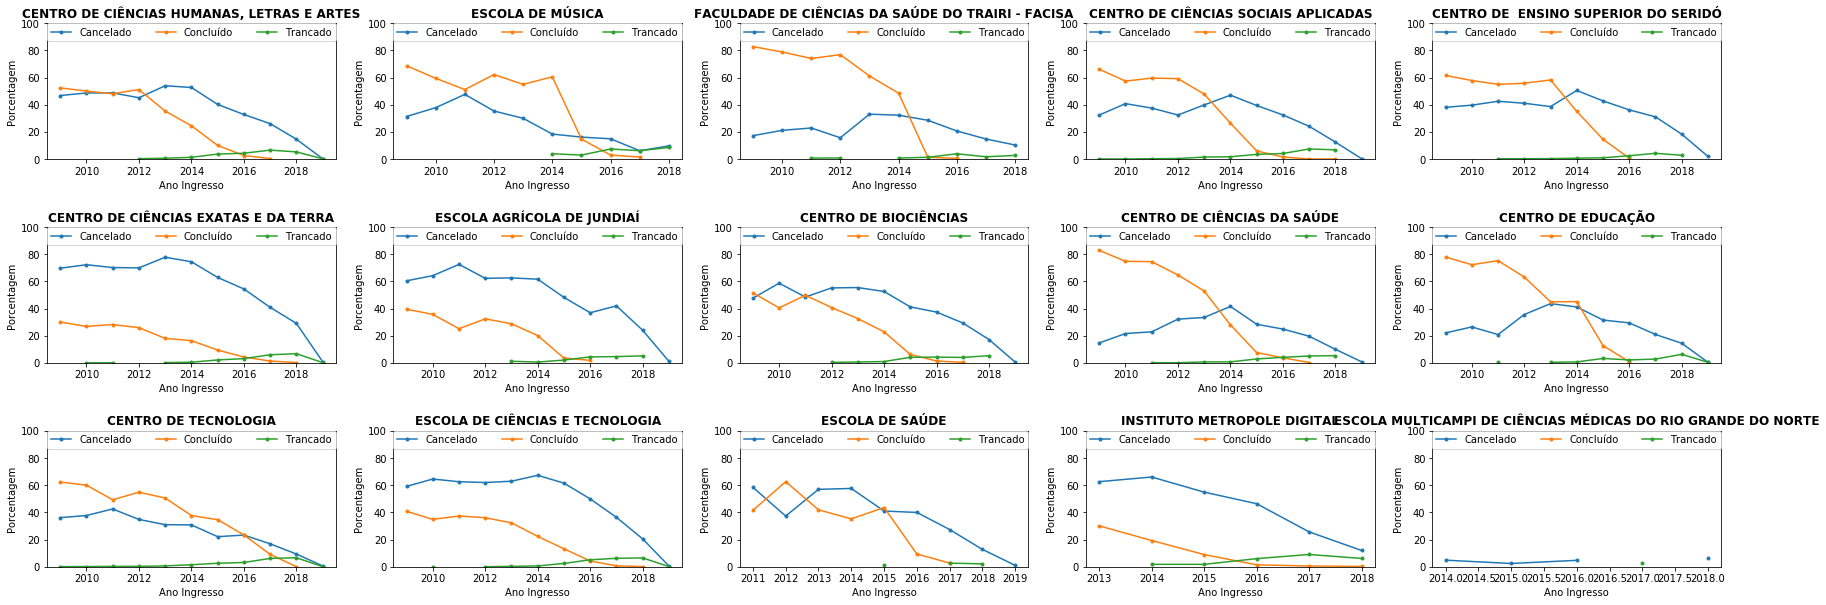

In [0]:
# Visualizaçao de todas unidades da UFRN

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for id_unidade, ii in zip(final_status['id_unidade'].unique(), range(1, 16)):
  dado = final_status.loc[final_status['id_unidade'] == id_unidade]
  
  ax = fig.add_subplot(3, 5, ii)

  ax.plot(dado['ano_ingresso'], dado['cancelado_pct'], label='Cancelado', marker='.')
  #ax.plot(dado['ano_ingresso'], dado['formando_pct'], label='Formando', marker='.')
  #ax.plot(dado['ano_ingresso'], dado['cadastrado_pct'], label='Cadastrado', marker='.')
  ax.plot(dado['ano_ingresso'], dado['concluído_pct'], label='Concluído', marker='.')
  #ax.plot(dado['ano_ingresso'], dado['formado_pct'], label='Formado', marker='.')
  ax.plot(dado['ano_ingresso'], dado['trancado_pct'], label='Trancado', marker='.')
  #ax.plot(dado['ano_ingresso'], dado['ativo_pct'], label='Ativo', marker='.')
  ax.set_xlabel('Ano Ingresso')
  ax.set_ylabel('Porcentagem')
  ax.set_title(dado.iloc[0, 1], fontweight='bold')
  ax.set_ylim(0, 100)
  ax.legend(loc=0, ncol=3, mode="expand", borderaxespad=0.)
  
plt.show()

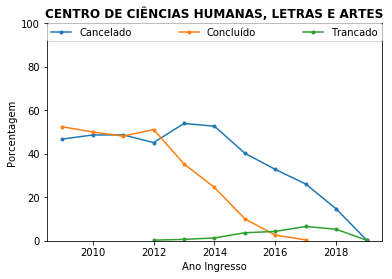

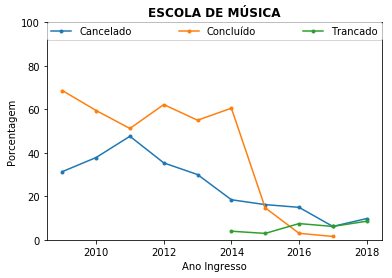

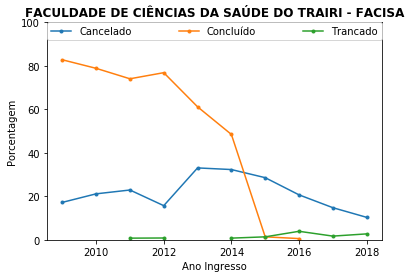

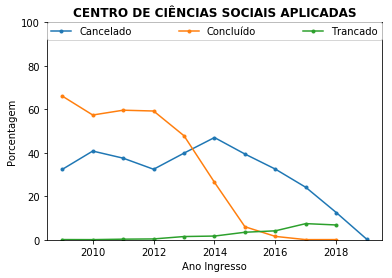

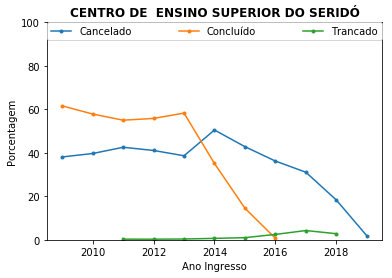

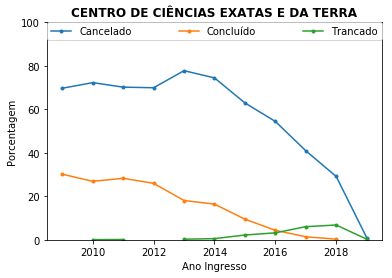

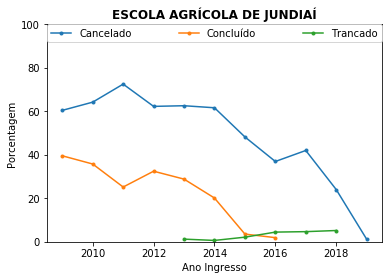

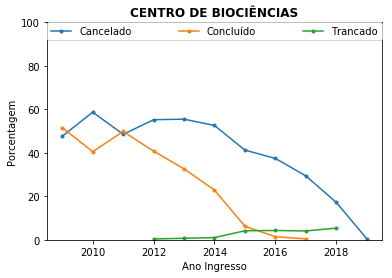

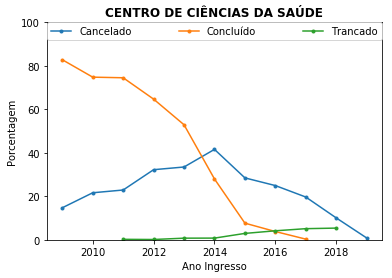

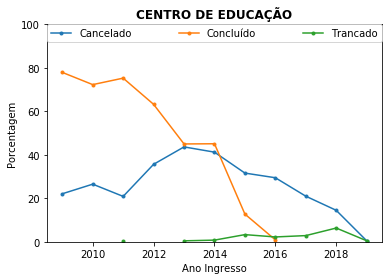

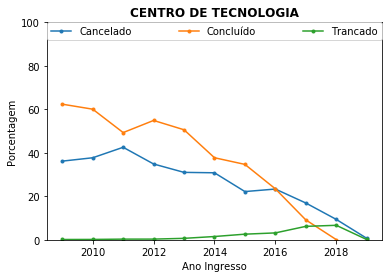

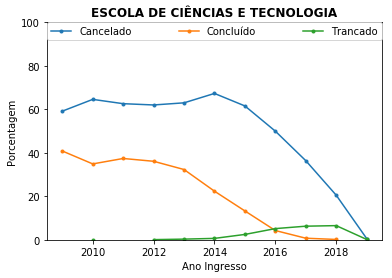

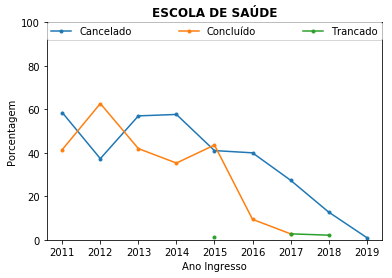

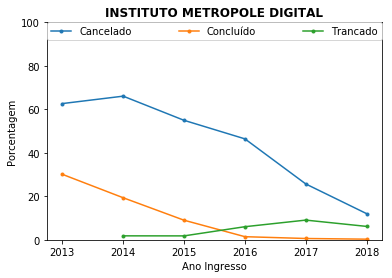

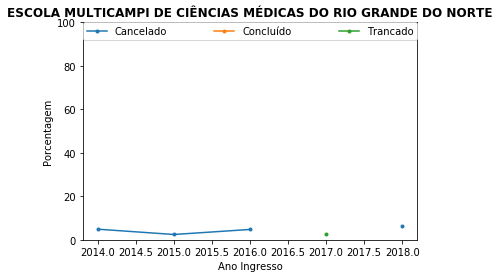

In [0]:
# Visualização por unidade da UFRN

import matplotlib.pyplot as plt

for id_unidade, ii in zip(final_status['id_unidade'].unique(), range(1, 16)):
  dado = final_status.loc[final_status['id_unidade'] == id_unidade]

  plt.plot(dado['ano_ingresso'], dado['cancelado_pct'], label='Cancelado', marker='.')
  #plt.plot(dado['ano_ingresso'], dado['formando_pct'], label='Formando', marker='.')
  #plt.plot(dado['ano_ingresso'], dado['cadastrado_pct'], label='Cadastrado', marker='.')
  plt.plot(dado['ano_ingresso'], dado['concluído_pct'], label='Concluído', marker='.')
  #plt.plot(dado['ano_ingresso'], dado['formado_pct'], label='Formado', marker='.')
  plt.plot(dado['ano_ingresso'], dado['trancado_pct'], label='Trancado', marker='.')
  #plt.plot(dado['ano_ingresso'], dado['ativo_pct'], label='Ativo', marker='.')
  plt.xlabel('Ano Ingresso')
  plt.ylabel('Porcentagem')
  plt.title(dado.iloc[0, 1], fontweight='bold')
  plt.ylim(0, 100)
  plt.legend(loc=0, ncol=3, mode="expand", borderaxespad=0.)
  plt.show()

## 3.2 - Toda UFRN

In [0]:
#Fazendo a contagem da quantidade da UFRN em geral e calculando a porcentagem
status_discentes = discentes_graduacao.status.value_counts()
porcentagem = lambda x : round(((x / status_discentes.sum()) * 100), 2)
status_pct = [porcentagem(i) for i in status_discentes]

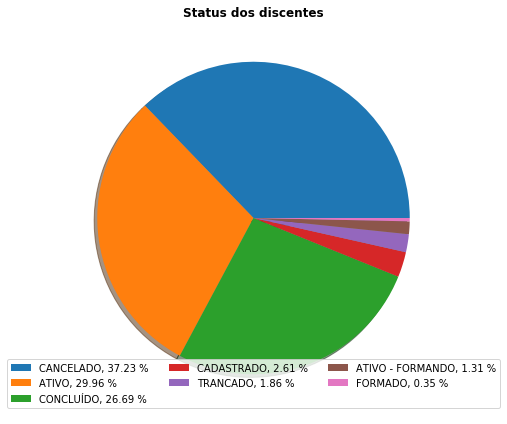

In [0]:
#Gerando gráfico com os dados
import matplotlib.pyplot as plt

plt.figure(figsize=(7,14))
plt.pie(status_discentes,shadow=True)
plt.legend( loc = 'lower center', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(status_discentes.index.values, status_pct)], ncol=3)
plt.title('Status dos discentes', fontweight='bold')
plt.show()

## Análise

Percebe-se aqui que o número de cancelados é maioria em quase todas unidades, e que o o geral da UFRN segue o mesmo, também percebemos que a porcentagem de concluidos na UFRN é menor que o número de ativos e aproximadamente 10% menor que cancelados. Um outro fato interessante é que a porcentagem de trancados é baixa, mostrando que a maioria das evasões são por motivos de cancelamento e não por trancamento.

# 4 - Avaliação dos discentes para os docentes do IMD 

In [0]:
import pandas as pd

avaliacao = pd.read_csv("avaliacaodocencia.csv", sep=';')
docentes = pd.read_csv("docentes.csv", sep=';')

In [0]:
avaliacao_columns = ['id_docente', 'nome_docente', 'id_turma', 'ano', 'periodo', 'qtd_discentes', 
                     'postura_profissional_media', 'postura_profissional_DP', 'atuacao_profissional_media', 
                     'atuacao_profissional_DP', 'autoavaliacao_aluno_media', 'autoavaliacao_aluno_DP']
docentes_columns = ['id_servidor', 'tipo_jornada_trabalho', 'categoria', 'lotacao', 'admissao']

In [0]:
avaliacao_docentes = pd.merge(left=avaliacao[avaliacao_columns], right=docentes[docentes_columns], how='inner', left_on='id_docente', right_on='id_servidor')

In [0]:
import numpy as np

lotacao_avaliacao_aluno = pd.pivot_table(avaliacao_docentes,values='autoavaliacao_aluno_media', index=['lotacao','nome_docente'],columns=['ano'],aggfunc=[np.mean,np.median])

In [0]:
lotacao_aval_media= dict()

In [0]:
lotacao_aval_mediana = dict()

In [0]:
for k,ano in lotacao_avaliacao_aluno:
  c = lotacao_avaliacao_aluno[(k,ano)]
  if k == 'mean':
    lotacao_aval_media[ano] = dict()
    for dept_nome,dept_media in c.iteritems():
       lotacao_aval_media[ano][dept_nome] = dept_media
  else:
    lotacao_aval_mediana[ano] = dict()
    for dept_nome,dept_mediana in c.iteritems():
       lotacao_aval_mediana[ano][dept_nome] = dept_mediana
    

In [0]:
media_aluno_lotacao = pd.DataFrame(lotacao_aval_media)

In [0]:
import math

In [0]:
avaliacao_imd_media = {}

for i,k in media_aluno_lotacao.items():
  if not(i in avaliacao_imd_media):
    avaliacao_imd_media[i] = {}
    
  for a, b in k.iteritems():
    lotacao = a[0]
    docente = a[1]
    if lotacao.find("INSTITUTO METROPOLE DIGITAL") != -1:
      if not(math.isnan(b)):
        avaliacao_imd_media[i][docente] = b

In [0]:
import operator

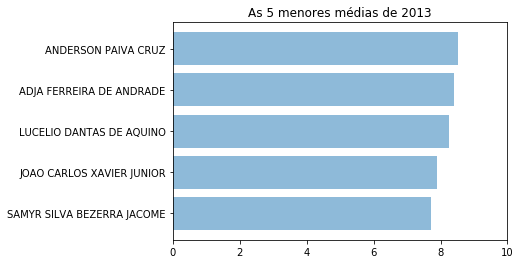

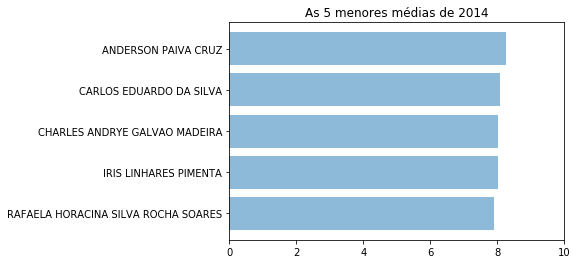

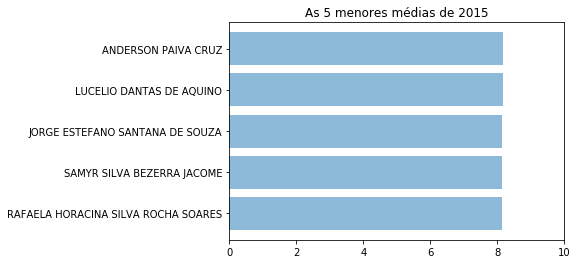

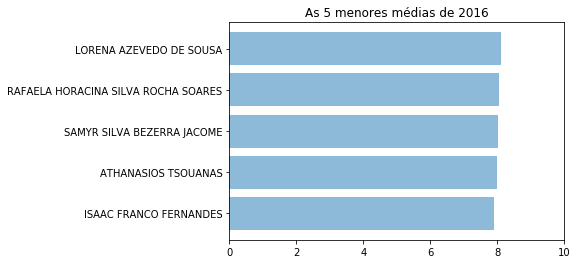

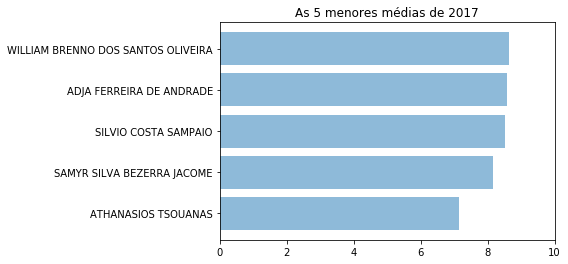

In [197]:
import matplotlib.pyplot as plt

docentes  = []
aval = []
for i,j in avaliacao_imd_media.items():
  avaliacao = sorted(j.items(), key=operator.itemgetter(1))
  docentes  = []
  aval = []
  for k,p in avaliacao:
    docentes +=[k]
    aval+=[p]
    
  plt.barh(range(0,5),aval[0:5], alpha=0.5)
  plt.yticks(range(0,5),docentes[0:5])
  plt.title("As 5 menores médias de " + str(i))
  plt.show()
    

## Análise

A partir dos gráficos, percebe-se que, para o Instituto Metrópole Digital (IMD),  entre as cinco menores médias de avaliação dos docentes nos anos de 2013 a 2017, é recorrente a aparição daqueles que ministram matérias obrigatórias ou que envolvam cálculo e programação.

# 5 - Gastos das unidades

In [0]:
import pandas as pd

gastos = pd.read_csv("gastos-por-unidade.csv",sep=';')

In [0]:
unidades = pd.read_csv("unidades.csv",sep=';')

In [0]:
gastos_columns = ['id_unidade','natureza_despesa','valor']
unidades_columns = ['id_unidade','nome_unidade','sigla','municipio','unidade_responsavel']
gastos_unidades_merged = pd.merge(left=gastos[gastos_columns], right=unidades[unidades_columns], how='inner', left_on='id_unidade', right_on='id_unidade')

In [0]:
def tratarDados(valor):
  valor = valor.replace("R$","")
  valor = valor.replace(".","")
  valor = valor.replace(",",".")
  return float(float(valor))
  

In [0]:
gastos_unidades_merged.valor = gastos_unidades_merged.valor.apply(tratarDados)

In [0]:
nome_unidades = gastos_unidades_merged.nome_unidade.unique()

In [0]:
gastos_unidades_agrupados = gastos_unidades_merged.loc[:,['nome_unidade','valor']].groupby(['nome_unidade']).sum().valor

In [0]:
gastos_unidades_agrupados = gastos_unidades_agrupados.sort_values(ascending=False)

In [0]:
maiores_gastos = gastos_unidades_agrupados.iloc[0:20]

In [0]:
maiores_gastos_valores_lista = list(maiores_gastos.values)

In [0]:
maiores_gastos_nome_lista = list(maiores_gastos.index)

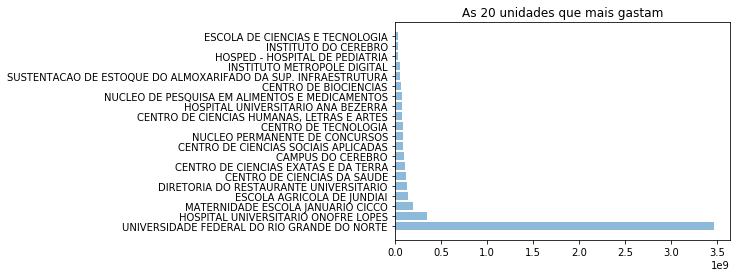

In [0]:
#Gerando o gráfico com as unidades e os valores dos gastos na casa dos bilhões

import matplotlib.pyplot as plt

plt.barh(range(0,20),maiores_gastos_valores_lista, alpha=0.5)
plt.yticks(range(0,20),maiores_gastos_nome_lista)
plt.title("As 20 unidades que mais gastam")
plt.show()

## Análise

Percebe-se que entre as unidades que mais gastam(bilhões), a UFRN encontra-se em primeiro (por ser o local geral isto já era de se esperar) e o IMD encontra na décima sétima posição.